# Titantic Survival Predition

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

## Part 1: Exploratory Data Analysis

In [2]:
# Read dataset
df = pd.read_csv('file/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
#df['Age'] = df['Age'].fillna(0)
df =df.dropna()

<AxesSubplot:>

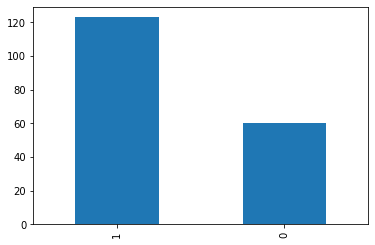

In [7]:
# check survival rate

count = df.Survived.value_counts()
count.plot(kind = 'bar')

(array([24., 48., 38., 32., 13., 11.,  1.,  0.,  6.,  2.,  6.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 [<matplotlib.patches.Polygon at 0x7fbb894e9e50>])

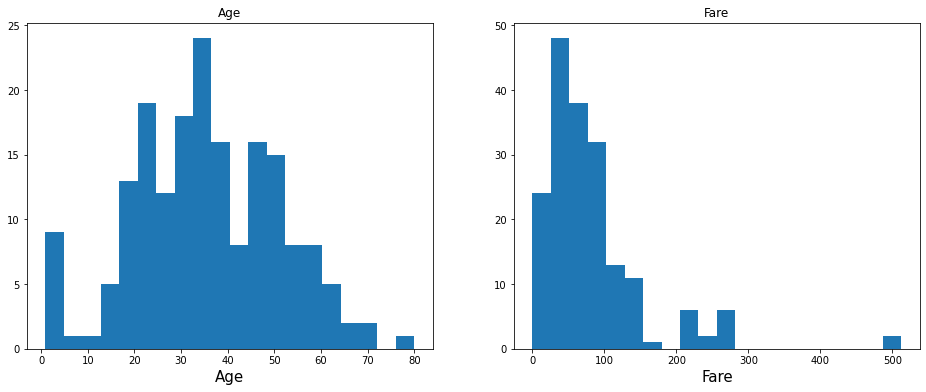

In [8]:
# check all numerical variables
plt.figure(figsize=(16,6))

plt.subplot(1, 2, 1)
plt.xlabel('Age', size=15)
plt.title("Age")
plt.hist(df.Age,histtype='stepfilled', bins=20)

plt.subplot(1, 2, 2)

plt.xlabel('Fare', size=15)
plt.title("Fare")
plt.hist(df.Fare,histtype='stepfilled', bins=20)

<AxesSubplot:>

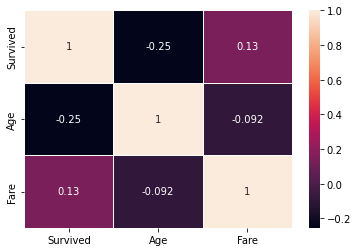

In [9]:
# corr diagram
dfn = df[["Survived", "Age", "Fare"]]
corr = dfn.corr()
sns.heatmap(corr,annot = True, linewidth = .5)

* seems Fare and Survived are mildly correlated

Text(0.5, 1.0, 'Boxplot of Pclass')

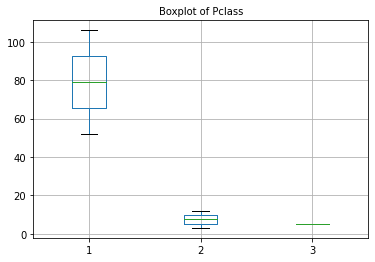

In [10]:
# check frequency table for categorical variables

Pclass_ct = pd.crosstab(df.Survived, df.Pclass)
Pclass_ct.boxplot()
plt.title('Boxplot of Pclass', size=10)

Text(0.5, 1.0, 'Boxplot of Sex')

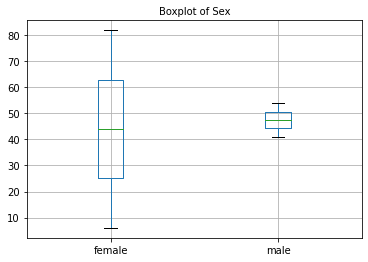

In [11]:
Sex_ct = pd.crosstab(df.Survived, df.Sex)
Sex_ct.boxplot()
plt.title('Boxplot of Sex', size=10)

Text(0.5, 1.0, 'Boxplot of Number of Siblings on Titanic')

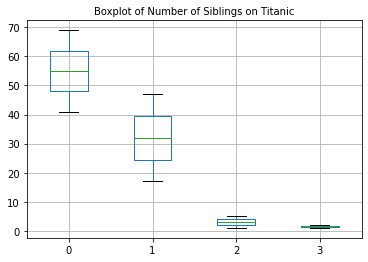

In [12]:
Sibsp_ct = pd.crosstab(df.Survived, df.SibSp)
Sibsp_ct.boxplot()
plt.title('Boxplot of Number of Siblings on Titanic', size=10)

Text(0.5, 1.0, 'Boxplot of port of embarkation')

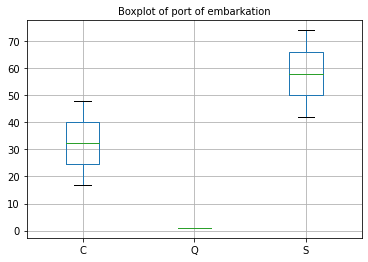

In [13]:
Embarked_ct = pd.crosstab(df.Survived, df.Embarked)
Embarked_ct.boxplot()
plt.title('Boxplot of port of embarkation', size=10)

#C = Cherbourg, Q = Queenstown, S = Southampton

* it is seems that all variables has significance towards model. Further investigations are required. 

## Data Manipulation

In [14]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [15]:
#change Sex to number
df['Sex'].replace('female',0,inplace=True)
df['Sex'].replace('male',1,inplace=True)

In [16]:
df.Sex.head(5)

1     0
3     0
6     1
10    0
11    0
Name: Sex, dtype: int64

In [17]:
#change Embarked to number
#C = Cherbourg, Q = Queenstown, S = Southampton
df['Embarked'].replace('C',0,inplace=True)
df['Embarked'].replace('Q',1,inplace=True)
df['Embarked'].replace('S',2,inplace=True)

In [18]:
df.Embarked.head(5)

1     0
3     2
6     2
10    2
11    2
Name: Embarked, dtype: int64

# Machine Learning Model

## 1. Logistic Regression

In [19]:
# import library
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [20]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2


In [21]:
# log fare
# df['logFare'] = np.log2(df["Fare"]+1)
# print(df.logFare)

In [22]:
# define variables
Y = df.Survived
X = df[["Pclass","Sex","Age", "SibSp", "Parch","Embarked", "Fare"]]

In [23]:
# train_test split
x_test,x_train,y_test,y_train=train_test_split(X,Y,test_size=0.20)
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [24]:
# Do predictions on test set
y_pred = lr.predict(x_test)

In [25]:
# import library for confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix

Accuracy score is: 0.678082191780822


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


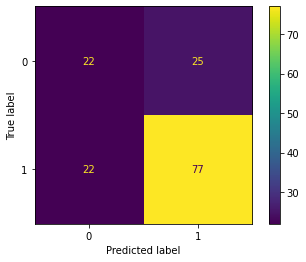

In [26]:
#accuracy score
print("Accuracy score is:", accuracy_score(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(lr, x_test, y_test)


In [27]:
# evaluation statistical significance
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.506656
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   37
Model:                          Logit   Df Residuals:                       30
Method:                           MLE   Df Model:                            6
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.2185
Time:                        21:32:06   Log-Likelihood:                -18.746
converged:                       True   LL-Null:                       -23.986
Covariance Type:            nonrobust   LLR p-value:                    0.1058
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         1.4869      0.678      2.193      0.028       0.158       2.816
Sex           -2.0519      0.

In [28]:
# now seems only certain variables are significant, including PClass, Sex, and Fare. 
# PClass & Fare is by nature highly correlated 
# try to fit a new model

Y = df.Survived
X = df[["Pclass","Sex"]]

In [29]:
# train_test split
x_test,x_train,y_test,y_train=train_test_split(X,Y,test_size=0.20)
lr2 = LogisticRegression()
lr2.fit(x_train, y_train)

LogisticRegression()

In [30]:
# Do predictions on test set
y_pred = lr2.predict(x_test)

Accuracy score is: 0.7123287671232876


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


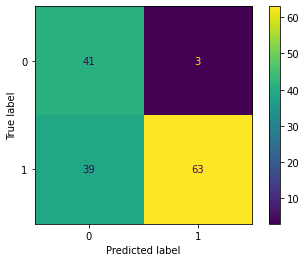

In [31]:
#accuracy score
print("Accuracy score is:", accuracy_score(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(lr2, x_test, y_test)


In [32]:
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.575924
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                   37
Model:                          Logit   Df Residuals:                       35
Method:                           MLE   Df Model:                            1
Date:                Tue, 21 Feb 2023   Pseudo R-squ.:                  0.1580
Time:                        21:32:06   Log-Likelihood:                -21.309
converged:                       True   LL-Null:                       -25.308
Covariance Type:            nonrobust   LLR p-value:                  0.004686
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass         0.7885      0.416      1.893      0.058      -0.028       1.605
Sex           -1.9677      0.

## Importing Test Data

In [33]:
# import test data 
sub = pd.read_csv('file/test.csv')
sub.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [34]:
# drop irrelevant field
sub = sub[['Pclass','Sex']]

In [35]:
sub.isna().sum()

Pclass    0
Sex       0
dtype: int64

In [36]:
# change nan to 0
sub = sub.fillna(0)

In [37]:
#change Sex to number
sub['Sex'].replace('female',0,inplace=True)
sub['Sex'].replace('male',1,inplace=True)

In [38]:
#change Embarked to number
#C = Cherbourg, Q = Queenstown, S = Southampton
#sub['Embarked'].replace('C',0,inplace=True)
#sub['Embarked'].replace('Q',1,inplace=True)
#sub['Embarked'].replace('S',2,inplace=True)

In [39]:
# remove fare
# sub = sub.drop(columns = ['Fare'])

In [40]:
# write into test data
y_pred_lr = lr2.predict(sub)

In [41]:
# produce submission
predictions = y_pred_lr
predictions= [int(x) for x in predictions]

In [42]:
test = pd.read_csv('file/test.csv')

In [43]:
submission=pd.DataFrame()
submission["PassengerId"]= test["PassengerId"]
submission["Survived"]=predictions= [int(x) for x in predictions]
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [44]:
submission.to_csv('submission_lr.csv',index=False)

* 78% accruracy